Gráfico de la matriz X como un colormap.

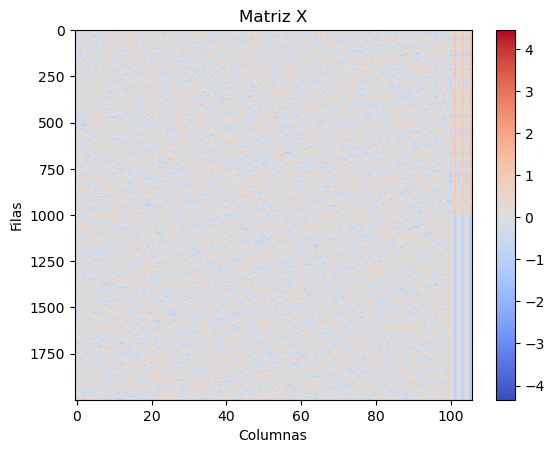

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('dataset.csv', header=None)

df = df.iloc[1:, 1:]

matriz = df.values

def euclinean_distance(xi, xj, sigma):
    return np.exp(-np.linalg.norm(xi - xj)**2 / (2 * sigma ** 2))


def similarity_matrix(matriz, sigma):
    n = matriz.shape[0]
    s = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            s[i, j] = euclinean_distance(matriz[i, :], matriz[j, :], sigma)
    return s

plt.imshow(matriz, cmap='coolwarm', aspect='auto')
plt.colorbar()  # Añadir una barra de color para mostrar el gradiente
plt.title('Matriz X')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.show()

Matriz X centrada: 

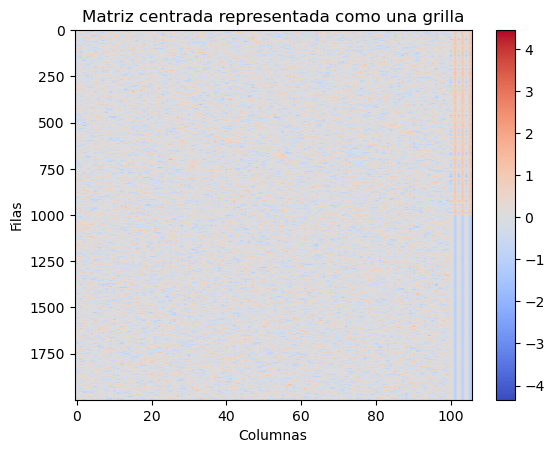

In [2]:
def center_matrix(matrix):
    """
    Función que recibe una matriz y resta a cada columna el promedio de los valores que se encuentran en esa columna.
    """
    for i in range(matrix.shape[1]):
        matrix[:, i] -= np.mean(matrix[:, i])
    return matrix


matriz_cent = center_matrix(matriz)

plt.imshow(matriz_cent, cmap='coolwarm', aspect='auto')
plt.colorbar()  # Añadir una barra de color para mostrar el gradiente
plt.title('Matriz centrada representada como una grilla')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.show()

Matrices de similaridad para distintos valores de sigma sobre la matriz X centrada.

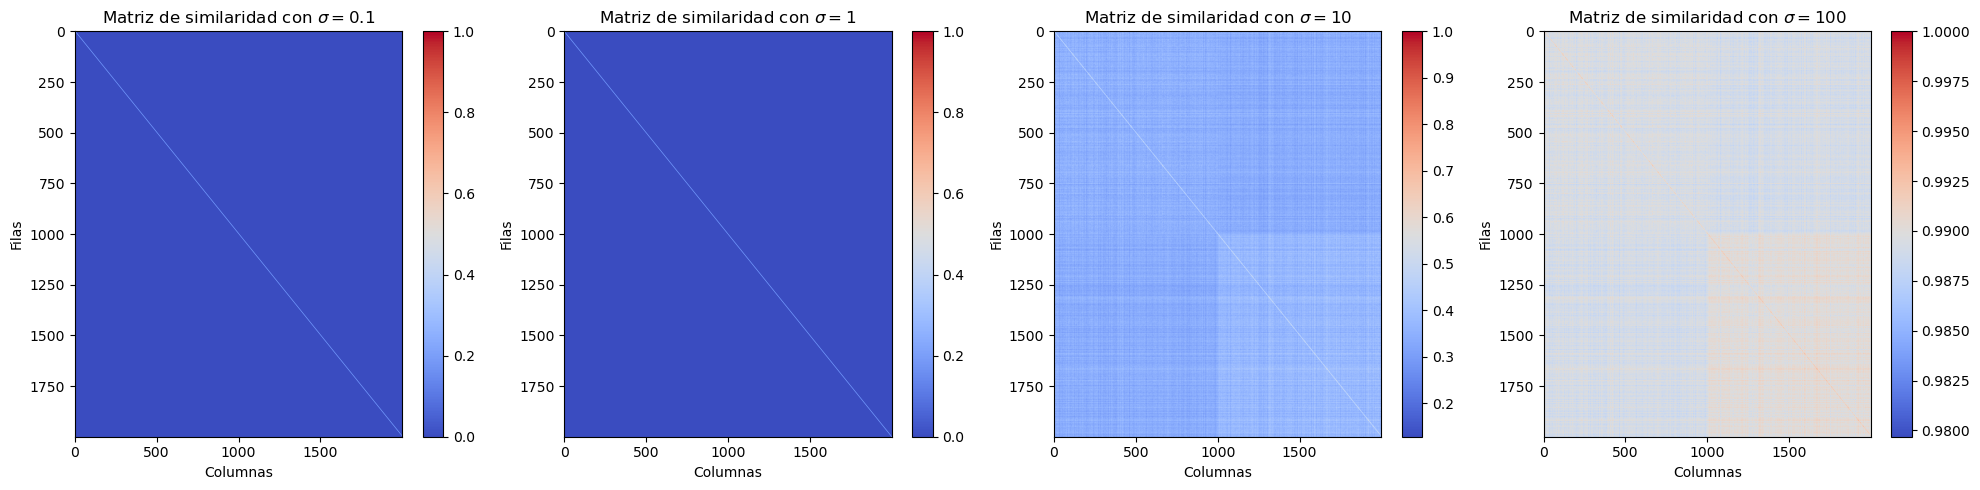

In [3]:
#Visualización de la matriz de similaridad para distintos valores de sigma 
sigmas = [0.1, 1, 10, 100]

fig, axs = plt.subplots(1, len(sigmas), figsize=(20, 5))

for i, sigma in enumerate(sigmas):
    s = similarity_matrix(matriz_cent, sigma)
    cax = axs[i].imshow(s, cmap='coolwarm', aspect='auto')
    axs[i].set_title(r'Matriz de similaridad con $\sigma = {}$'.format(sigma))
    axs[i].set_xlabel('Columnas')
    axs[i].set_ylabel('Filas')
    
    # Añadir un colorbar para cada subplot
    fig.colorbar(cax, ax=axs[i])

plt.tight_layout()
plt.show()

Descomposición SVD de la matriz X centrada: 

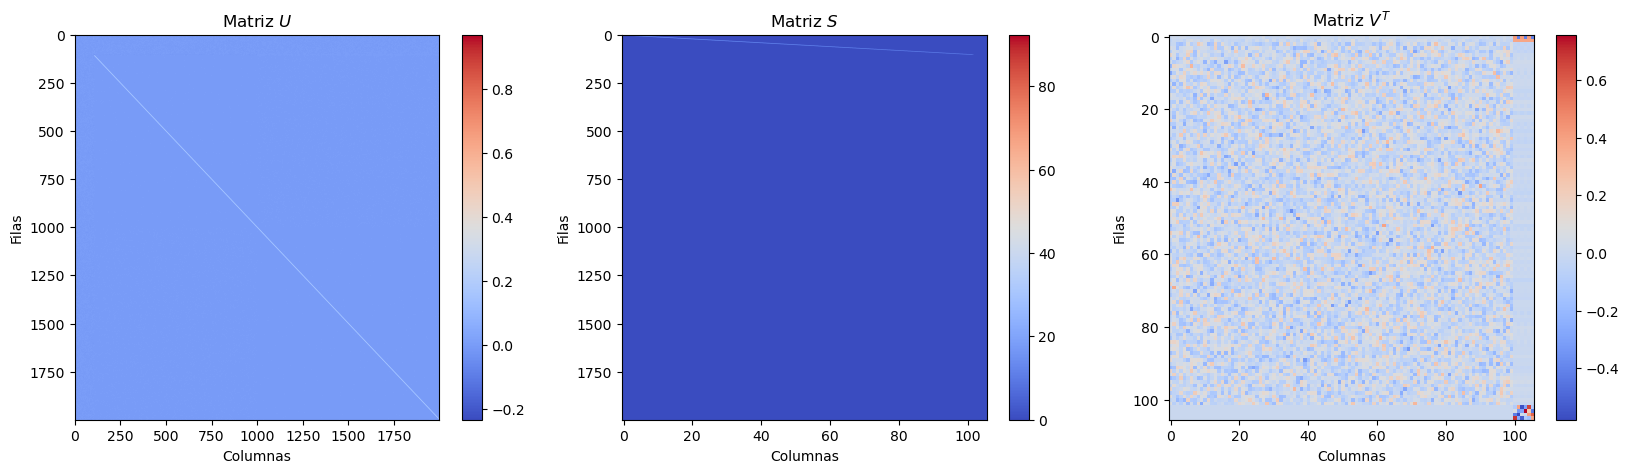

In [31]:
u, s, v_T = np.linalg.svd(matriz_cent)

# Rellenar de 0 la matriz S
sigma = np.zeros((u.shape[1], v_T.shape[0]))
np.fill_diagonal(sigma, s)

# Gráfico de las matrices U, S y V_T
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(u, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title(r'Matriz $U$')
plt.xlabel('Columnas')
plt.ylabel('Filas')

plt.subplot(1, 3, 2)
plt.imshow(sigma, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title(r'Matriz $S$')
plt.xlabel('Columnas')
plt.ylabel('Filas')

plt.subplot(1, 3, 3)
plt.imshow(v_T, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title(r'Matriz $V^T$')
plt.xlabel('Columnas')
plt.ylabel('Filas')

plt.show()

Gráfico de los valores singulares que se encuentran en la diagonal de S

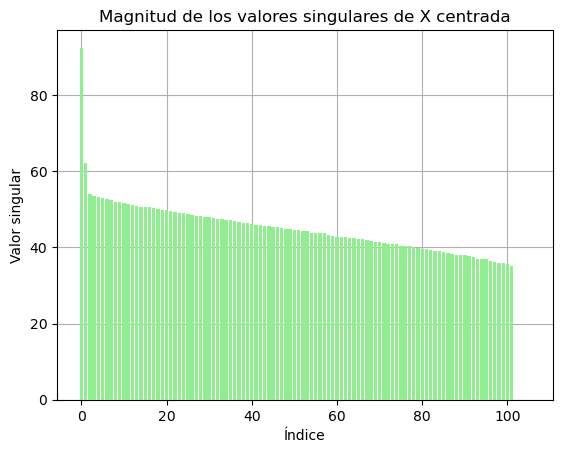

In [5]:
# Gráfico de los valores singulares que se encuantran en la diagonal de la matriz S como un gráfico de barras donde la altura de cada barra es el valor singular correspondiente
u, s , v_T = np.linalg.svd(matriz_cent)

plt.bar(range(len(s)), s, color='lightgreen',zorder=3)
plt.title('Magnitud de los valores singulares de X centrada')
plt.xlabel('Índice')
plt.ylabel('Valor singular')
plt.grid()
plt.show()

Gráfico del Kernel Gaussiano

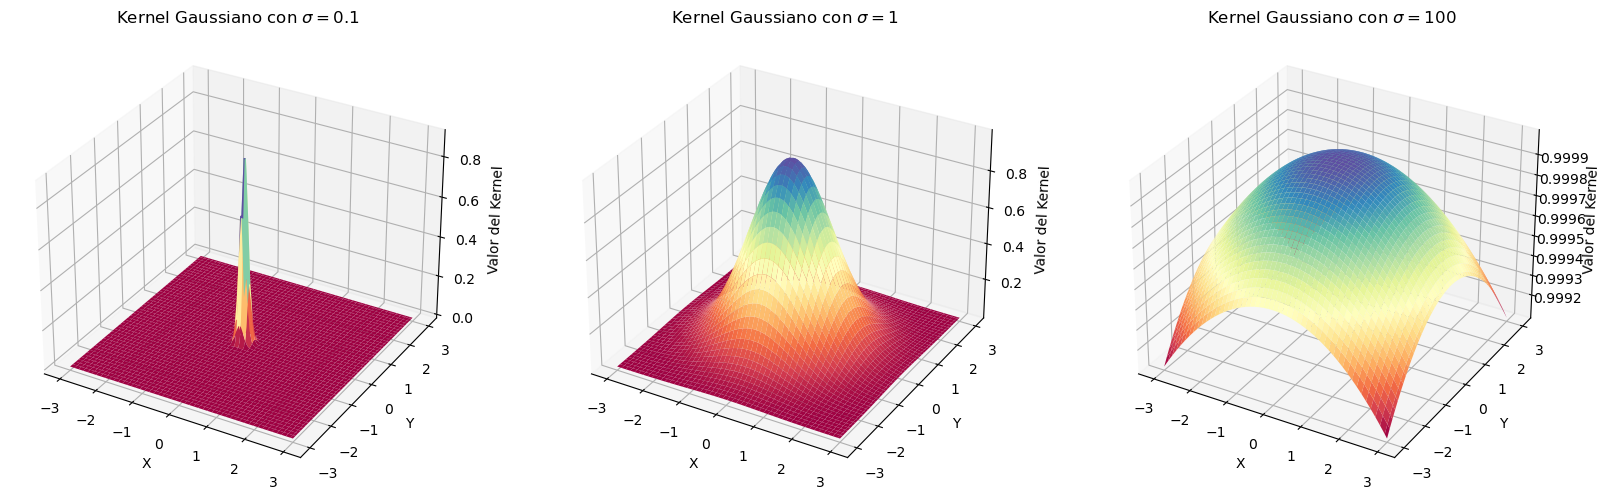

In [6]:
from mpl_toolkits.mplot3d import Axes3D

def kernel_gaussiano(x, y, sigma):
    return np.exp(-np.linalg.norm(x - y)**2 / (2 * sigma**2))

# Definir el punto fijo
punto_fijo = np.array([0, 0])

# Crear una cuadrícula de puntos
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Calcular el valor del kernel para sigma = 0.1
Z1 = np.array([[kernel_gaussiano(punto_fijo, np.array([xi, yi]), sigma=0.1) for xi, yi in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

# Calcular el valor del kernel para sigma = 100
Z2 = np.array([[kernel_gaussiano(punto_fijo, np.array([xi, yi]), sigma=100) for xi, yi in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

# Calcular el valor del kernel para sigma = 1
Z3 = np.array([[kernel_gaussiano(punto_fijo, np.array([xi, yi]), sigma=1) for xi, yi in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

# Crear subplots
fig = plt.figure(figsize=(20, 6))

# Subplot para sigma = 0.1
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z1, cmap='Spectral')
ax1.set_title(r'Kernel Gaussiano con $\sigma=0.1$')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Valor del Kernel')

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, Z3, cmap='Spectral')
ax2.set_title(r'Kernel Gaussiano con $\sigma=1$')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Valor del Kernel')


# Subplot para sigma = 100
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, Z2, cmap='Spectral')
ax3.set_title(r'Kernel Gaussiano con $\sigma=100$')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Valor del Kernel')

# Mostrar la gráfica
plt.show()



Gráficos de la matriz X tras la reducción de la dimensionalidad con d = 2.

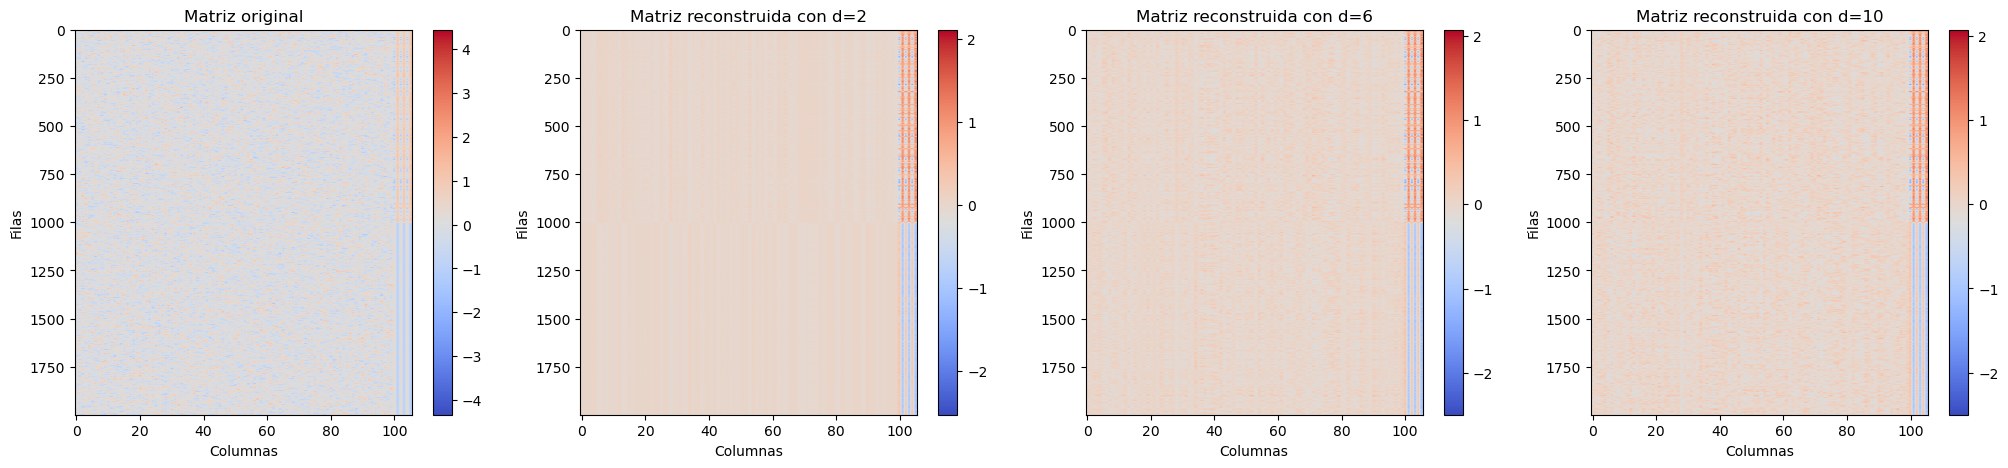

In [7]:
#Recortar las matrices U, S y V_T

def truncate_svd(u, s, v_T, k):
    """
    Función que recibe las matrices U, S y V_T de una descomposición SVD y un número k, y retorna las matrices U, S y V_T
    truncadas a las primeras k columnas.
    """
    return u[:, :k], np.diag(s[:k]), v_T[:k, :]

d = 2
u_2, s_2, v_T_2 = truncate_svd(u, s, v_T, d)

# Reconstruir la matriz original
matriz_2 = u_2 @ s_2 @ v_T_2

d = 6
u_6, s_6, v_T_6 = truncate_svd(u, s, v_T, d)

# Reconstruir la matriz original
matriz_6 = u_6 @ s_6 @ v_T_6

d = 10 
u_10, s_10, v_T_10 = truncate_svd(u, s, v_T, d)

# Reconstruir la matriz original
matriz_10 = u_10 @ s_10 @ v_T_10

#Gráfico de las matrices originales y reconstruidas
plt.figure(figsize=(25, 5))
plt.subplot(1, 4, 1)
plt.imshow(matriz, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Matriz original')
plt.xlabel('Columnas')
plt.ylabel('Filas')

plt.subplot(1, 4, 2)
plt.imshow(matriz_2, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Matriz reconstruida con d=2')
plt.xlabel('Columnas')
plt.ylabel('Filas')

plt.subplot(1, 4, 3)
plt.imshow(matriz_6, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Matriz reconstruida con d=6')
plt.xlabel('Columnas')
plt.ylabel('Filas')

plt.subplot(1, 4, 4)
plt.imshow(matriz_10, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Matriz reconstruida con d=10')
plt.xlabel('Columnas')
plt.ylabel('Filas')

plt.show()



Gráficos de Z para cada una de las reducciones de dimensionalidad

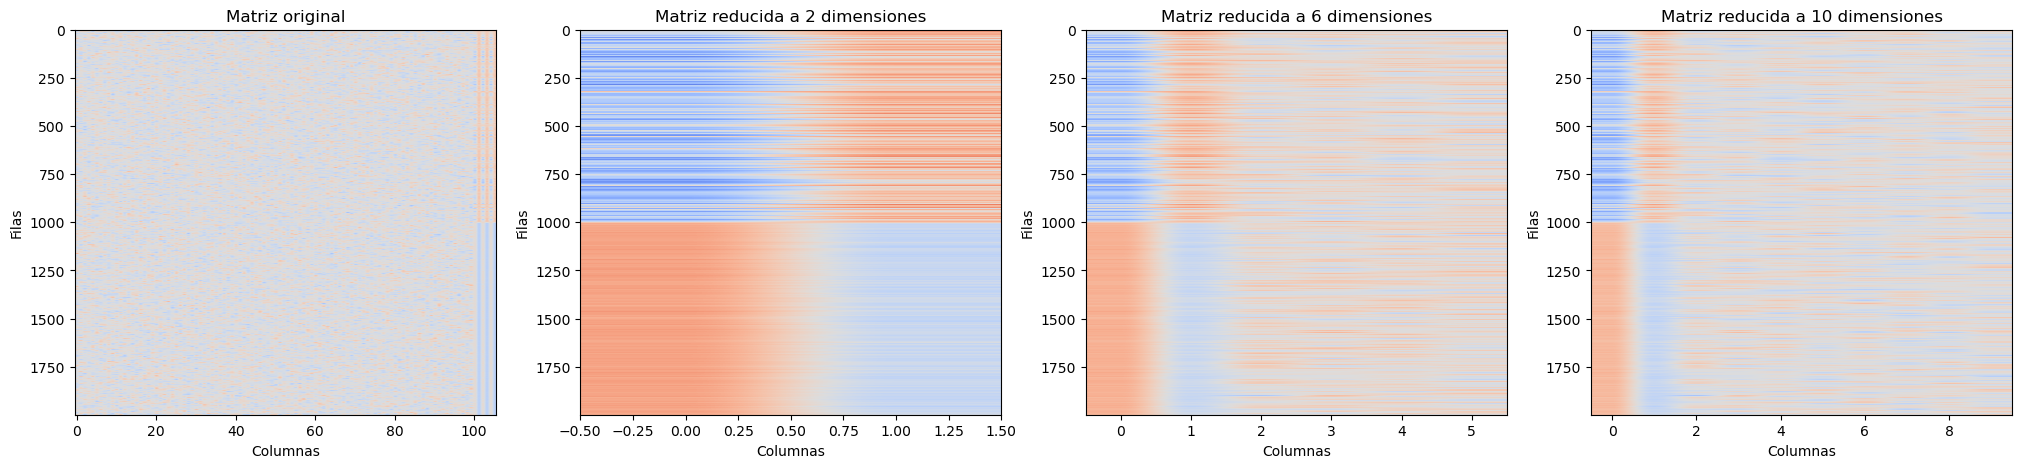

In [8]:
v_2 = v_T_2.T
v_6 = v_T_6.T
v_10 = v_T_10.T


Z_cent_2 = matriz @ v_2
Z_cent_6 = matriz @ v_6
Z_cent_10 = matriz @ v_10

fig, axs = plt.subplots(1, 4, figsize=(25, 5))

axs[0].imshow(matriz, cmap='coolwarm', aspect='auto')
axs[0].set_title('Matriz original')
axs[0].set_xlabel('Columnas')
axs[0].set_ylabel('Filas')


axs[1].imshow(Z_cent_2, cmap='coolwarm', aspect='auto')
axs[1].set_title('Matriz reducida a 2 dimensiones')
axs[1].set_xlabel('Columnas')
axs[1].set_ylabel('Filas')

axs[2].imshow(Z_cent_6, cmap='coolwarm', aspect='auto')
axs[2].set_title('Matriz reducida a 6 dimensiones')
axs[2].set_xlabel('Columnas')
axs[2].set_ylabel('Filas')

axs[3].imshow(Z_cent_10, cmap='coolwarm', aspect='auto')
axs[3].set_title('Matriz reducida a 10 dimensiones')
axs[3].set_xlabel('Columnas')
axs[3].set_ylabel('Filas')

plt.show()

Matriz de similaridad para Z con d = 2 para distintos valores de sigma

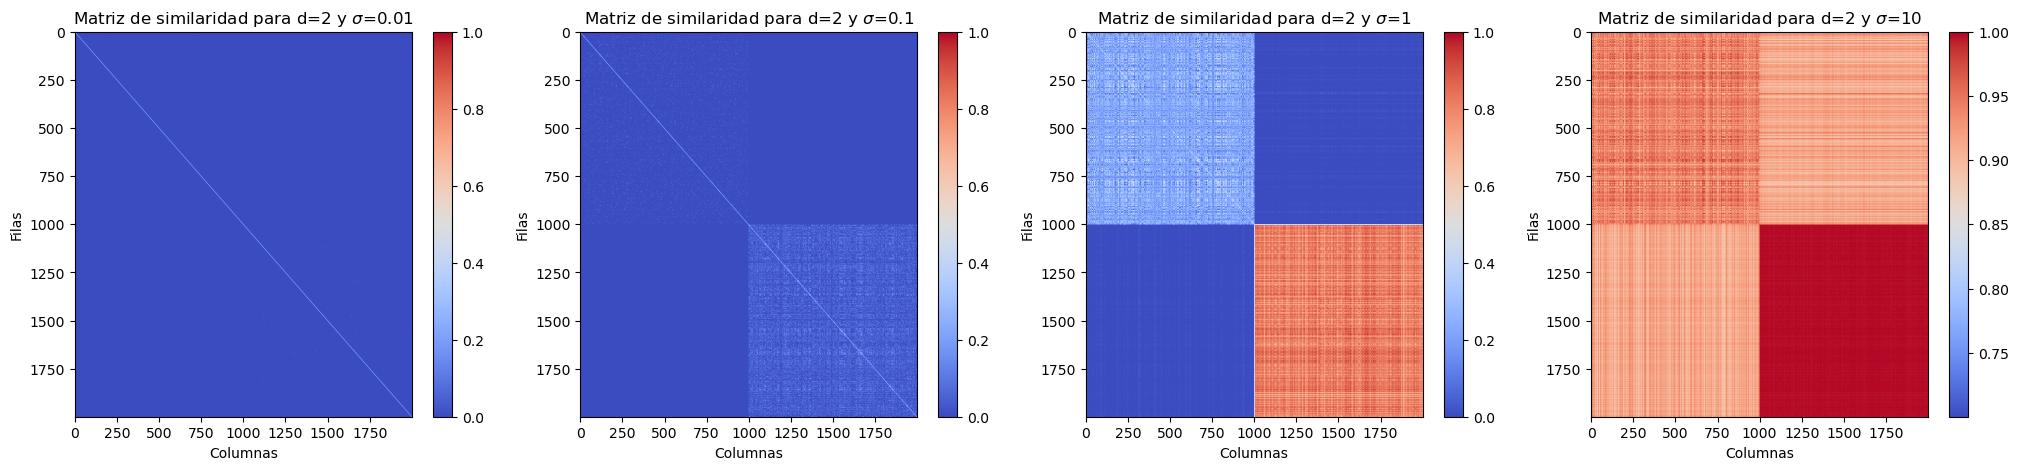

In [9]:
#Gráfico de las matrices de similaridad para d=2 con distintos valores de sigma


u, s, v_T = np.linalg.svd(matriz_cent)
d = 2
u_2, s_2, v_T_2 = truncate_svd(u, s, v_T, d)
v_2 = v_T_2.T
Z_cent_2 = matriz @ v_2

# Valores de sigma
sigma_values = [0.01, 0.1, 1, 10]

# Crear subplots
fig, axs = plt.subplots(1, 4, figsize=(25, 5))

for i, sigma in enumerate(sigma_values):
    # Crear matriz de similaridad
    similarity_matrix_2 = similarity_matrix(Z_cent_2, sigma)
    
    # Mostrar la matriz de similaridad
    cax = axs[i].imshow(similarity_matrix_2, cmap='coolwarm', aspect='auto')
    axs[i].set_title(rf'Matriz de similaridad para d=2 y $\sigma$={sigma}')
    axs[i].set_xlabel('Columnas')
    axs[i].set_ylabel('Filas')
    
    # Añadir barra de colores
    fig.colorbar(cax, ax=axs[i])

# Mostrar gráficos
plt.show()

Matriz de similaridad para Z = 6 y distintos valores de sigma

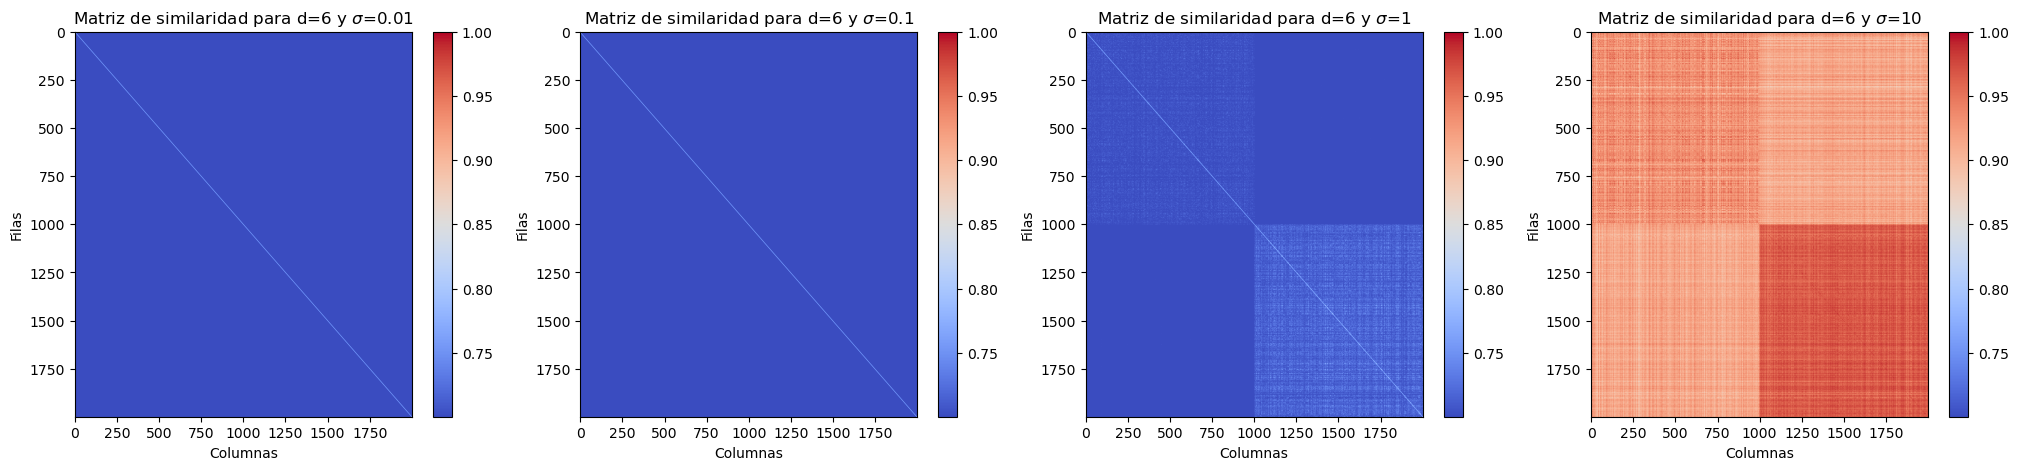

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))

for i, sigma in enumerate(sigma_values):
    similarity_matrix_6 = similarity_matrix(Z_cent_6, sigma)
    axs[i].imshow(similarity_matrix_6, cmap='coolwarm', aspect='auto')
    axs[i].set_title(rf'Matriz de similaridad para d=6 y $\sigma$={sigma}')
    axs[i].set_xlabel('Columnas')
    axs[i].set_ylabel('Filas')
    fig.colorbar(cax, ax=axs[i])

plt.show()

Matriz de similaridad para Z = 10 y distintos valores de sigma

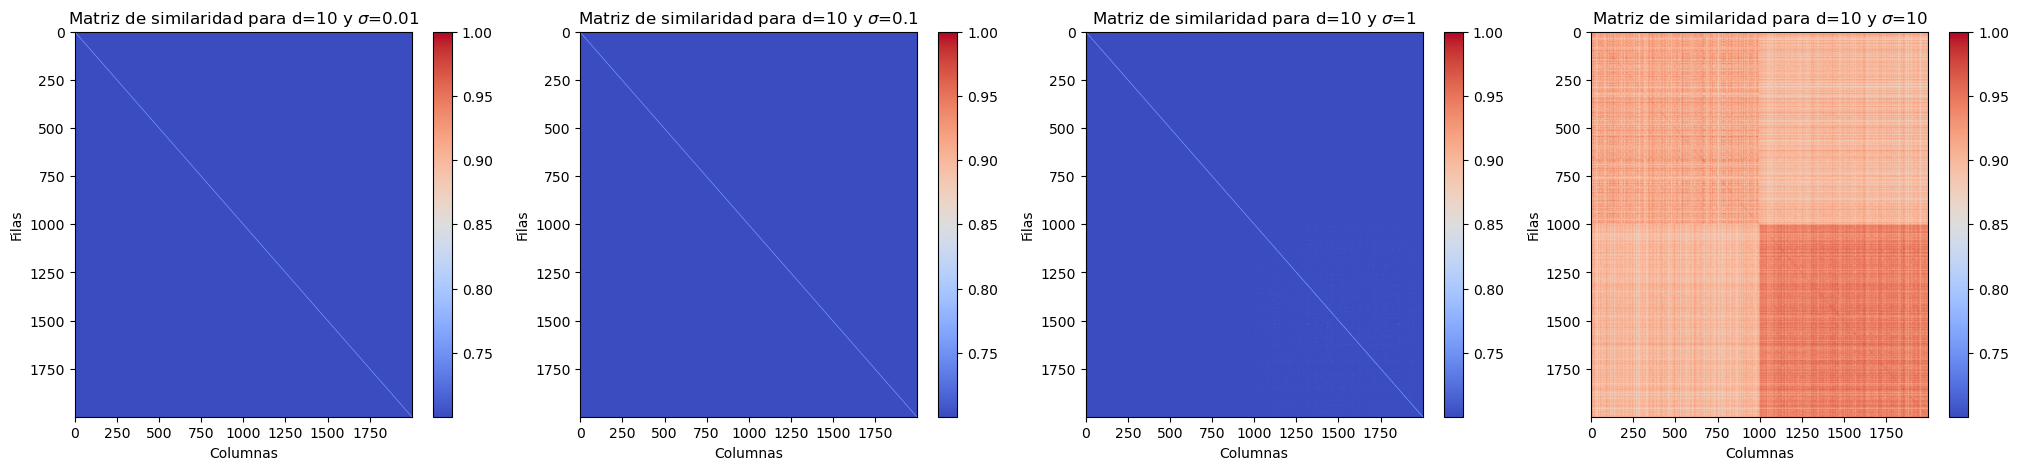

In [11]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))

for i, sigma in enumerate(sigma_values):
    similarity_matrix_10 = similarity_matrix(Z_cent_10, sigma)
    axs[i].imshow(similarity_matrix_10, cmap='coolwarm', aspect='auto')
    axs[i].set_title(rf'Matriz de similaridad para d=10 y $\sigma$={sigma}')
    axs[i].set_xlabel('Columnas')
    axs[i].set_ylabel('Filas')
    fig.colorbar(cax, ax=axs[i])

plt.show()

Norma de frobenius entre cada reducción con distintos d y la matriz original

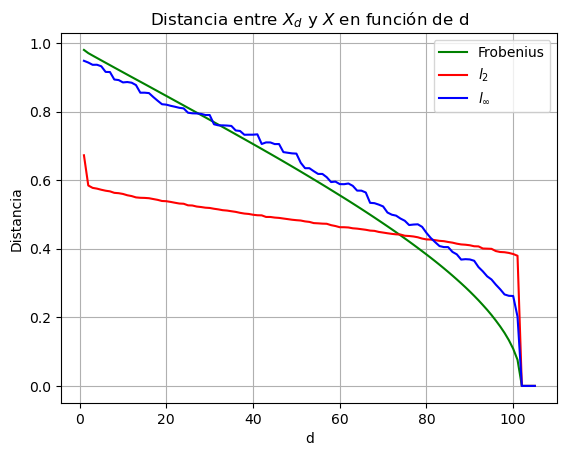

In [12]:
def frobenius_norm(matrix1, matrix2):
    """
    Calcula la norma de Frobenius entre dos matrices.

    Parámetros:
    matrix1 (np.ndarray): Primera matriz.
    matrix2 (np.ndarray): Segunda matriz.

    Retorna:
    float: Norma de Frobenius entre las dos matrices.
    """
    return np.linalg.norm(matrix1 - matrix2, ord='fro')

def l2_norm(matrix1, matrix2):
    """
    Calcula la norma L2 entre dos matrices.

    Parámetros:
    matrix1 (np.ndarray): Primera matriz.
    matrix2 (np.ndarray): Segunda matriz.

    Retorna:
    float: Norma L2 entre las dos matrices.
    """
    return np.linalg.norm(matrix1 - matrix2, ord=2)

def linf_norm(matrix1, matrix2):
    """
    Calcula la norma L_infinito entre dos matrices.

    Parámetros:
    matrix1 (np.ndarray): Primera matriz.
    matrix2 (np.ndarray): Segunda matriz.

    Retorna:
    float: Norma L_infinito entre las dos matrices.
    """
    return np.linalg.norm(matrix1 - matrix2, ord=np.inf)

ds = range(1, 106)  # Valores de d a probar

sigma = 1
# Grafico de la norma de Frobenius en función de d

frobenius_norms = []
l2_norms = []
linf_norms = []


for d in ds:
    u_d, s_d, v_T_d = truncate_svd(u, s, v_T, d)
    matriz_d = u_d @ s_d @ v_T_d
    frobenius_norms.append(frobenius_norm(matriz_cent, matriz_d)/frobenius_norm(matriz_cent, np.zeros(matriz_cent.shape)))
    l2_norms.append(l2_norm(matriz_cent, matriz_d)/l2_norm(matriz_cent, np.zeros(matriz_cent.shape)))
    linf_norms.append(linf_norm(matriz_cent, matriz_d)/linf_norm(matriz_cent, np.zeros(matriz_cent.shape)))

plt.plot(ds, frobenius_norms, color='green', label='Frobenius')
plt.plot(ds, l2_norms, color='red', label=r'$l_2$')
plt.plot(ds, linf_norms, color='blue', label=r'$l_{\infty}$')
plt.title(r'Distancia entre $X_d$ y $X$ en función de d')
plt.xlabel('d')
plt.ylabel('Distancia')
plt.grid()
plt.legend()
plt.show()

Gráfico de los clusters en R²

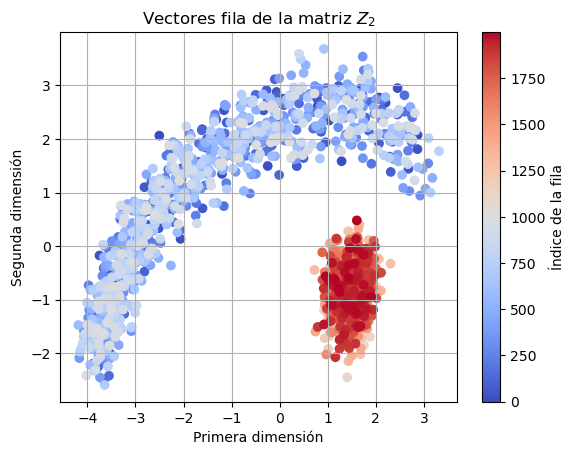

In [13]:
#Gráfico de cada uno de los vectores fila en R² de la matriz Z_cent_2

# Z_cent_2 = u_2 @ s_2

plt.figure()
plt.scatter(Z_cent_2[:, 0], Z_cent_2[:, 1], c=range(len(Z_cent_2)), cmap='coolwarm')
plt.title(r'Vectores fila de la matriz $Z_2$')
plt.xlabel('Primera dimensión')
plt.ylabel('Segunda dimensión')
plt.colorbar(label='Índice de la fila')
plt.grid()
plt.show()


Gráfico de los clusters en R³

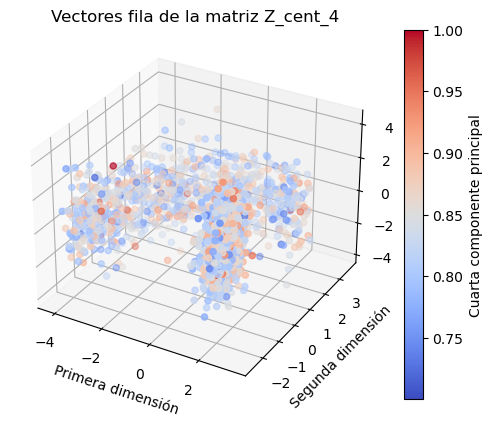

In [30]:
u3, s3, v_T3 = truncate_svd(u, s, v_T, 3)
u4, s4, v_T4 = truncate_svd(u, s, v_T, 4)


# Z_cent_3 = matriz @ v_T3.T
# Z_cent_3 = u3 @ s3
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(Z_cent_3[:, 0], Z_cent_3[:, 1], Z_cent_3[:, 2], c=range(len(Z_cent_3)), cmap='coolwarm')
# ax.set_title('Vectores fila de la matriz Z_cent_3')
# ax.set_xlabel('Primera dimensión')
# ax.set_ylabel('Segunda dimensión')
# ax.set_zlabel('Tercera dimensión')
# plt.show()

# Z_cent_4 = matriz @ v_T4.T
Z_cent_4 = u4 @ s4
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z_cent_4[:, 0], Z_cent_4[:, 1], Z_cent_4[:, 2], c=Z_cent_4[:,3], cmap='coolwarm')
ax.set_title('Vectores fila de la matriz Z_cent_4')
ax.set_xlabel('Primera dimensión')
ax.set_ylabel('Segunda dimensión')
ax.set_zlabel('Tercera dimensión')
fig.colorbar(cax, ax=ax, label='Cuarta componente principal')
plt.show()




2. Visualización de la magnitud de los componentes de los autovectores

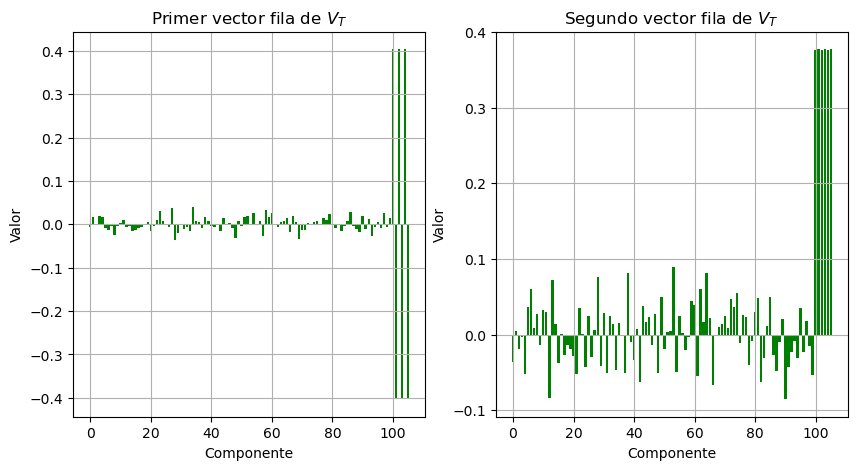

Los valores de las últimas 6 componentes del vector 1 son: [ 0.40371771 -0.40319445  0.40371771 -0.40319445  0.40371771 -0.40319445]
Los valores de las últimas 6 componentes del vector 2 son: [0.37691471 0.37734727 0.37691471 0.37734727 0.37691471 0.37734727]


In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(range(len(v_T[0, :])), v_T[0, :], color='green')
axs[0].set_title(r'Primer vector fila de $V_T$')
axs[0].set_xlabel('Componente')
axs[0].set_ylabel('Valor')
axs[0].grid()

axs[1].bar(range(len(v_T[1, :])), v_T[1, :], color='green')
axs[1].set_title(r'Segundo vector fila de $V_T$')
axs[1].set_xlabel('Componente')
axs[1].set_ylabel('Valor')
plt.grid()
plt.show()

# para cada vector, printear el valor de las últimas 6 componentes
for i in range(2):
    print(f'Los valores de las últimas 6 componentes del vector {i+1} son: {v_T[i, -6:]}')



3. Gráfico de y

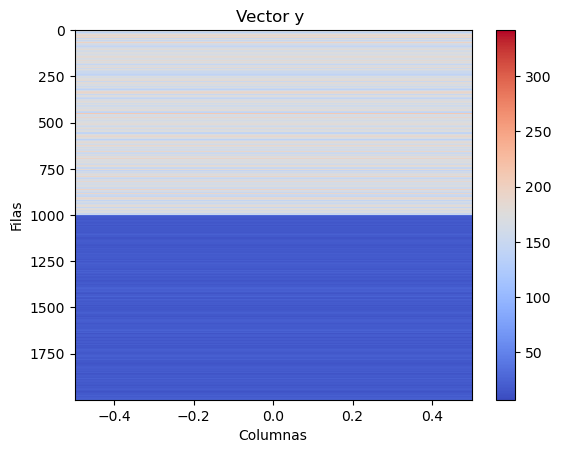

In [16]:
with open('y.txt', 'r') as file:
    lines = file.readlines()
lines = [line.strip() for line in lines]

y = np.array(lines, dtype=float)

plt.imshow(y[:, np.newaxis], cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Vector y ')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.show()

def inverse_diagonal(matrix):
    """
    Función que recibe una matriz diagonal y retorna la matriz inversa de la diagonal.
    Si un valor en la diagonal es 0 entonces, la matriz inversa va a tener 0 en esa posición.
    """
    inv = np.zeros_like(matrix)
    for i in range(matrix.shape[0]):
        if matrix[i, i] == 0:
            inv[i, i] = 1 / matrix[i, i]
    return inv




Gráfico de y centrado

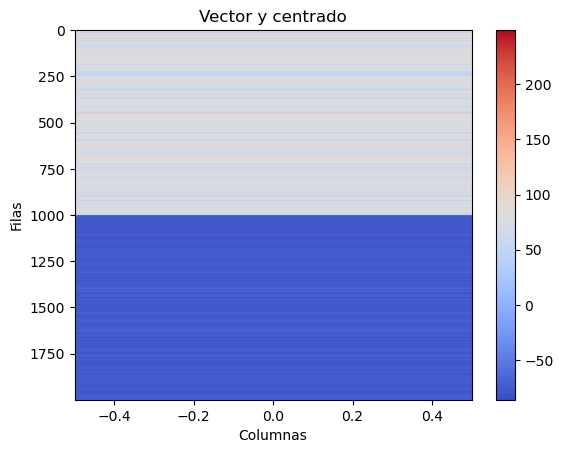

In [17]:
y_cent = y - np.mean(y)

plt.imshow(y_cent[:, np.newaxis], cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Vector y centrado')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.show()

Pseudo-inversa para distintos valores de d

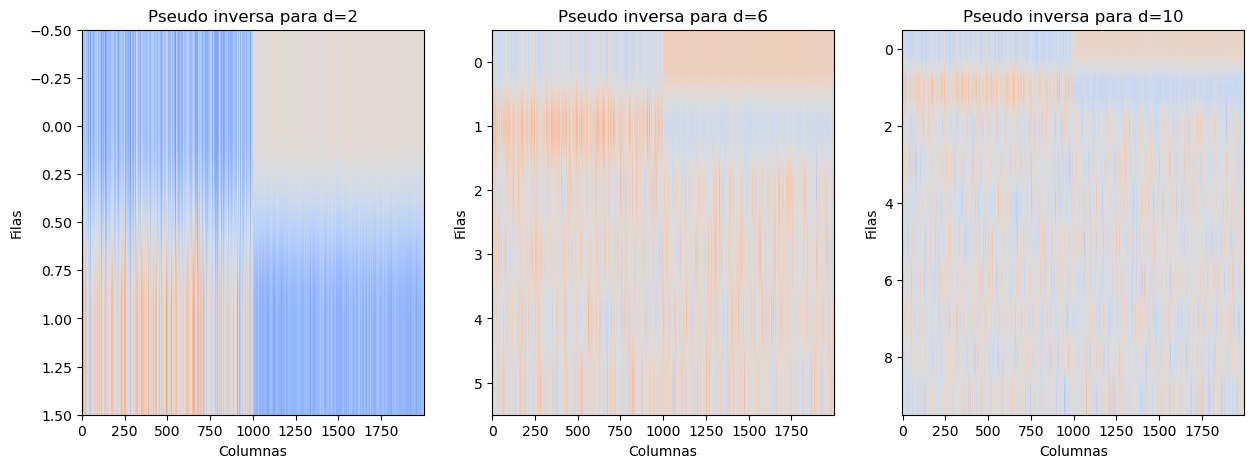

In [18]:
u2, s2, v_T2 = np.linalg.svd(Z_cent_2, full_matrices=False)

s2_inv = np.diag(1/s2)

pseudo_inverse2 = v_T2.T @ s2_inv @ u2.T

u6, s6, v_T6 = np.linalg.svd(Z_cent_6, full_matrices=False)

s6_inv = np.diag(1/s6)

pseudo_inverse6 = v_T6.T @ s6_inv @ u6.T

u10, s10, v_T10 = np.linalg.svd(Z_cent_10, full_matrices=False)

s10_inv = np.diag(1/s10)

pseudo_inverse10 = v_T10.T @ s10_inv @ u10.T

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(pseudo_inverse2, cmap='coolwarm', aspect='auto')
axs[0].set_title('Pseudo inversa para d=2')
axs[0].set_xlabel('Columnas')
axs[0].set_ylabel('Filas')
axs[1].imshow(pseudo_inverse6, cmap='coolwarm', aspect='auto')
axs[1].set_title('Pseudo inversa para d=6')
axs[1].set_xlabel('Columnas')
axs[1].set_ylabel('Filas')
axs[2].imshow(pseudo_inverse10, cmap='coolwarm', aspect='auto')
axs[2].set_title('Pseudo inversa para d=10')
axs[2].set_xlabel('Columnas')
axs[2].set_ylabel('Filas')
plt.show()


Aproximación del B para cada una de las matrices pseudoinversas que fueron recortadas: hago beta = pseudo_inversa * y

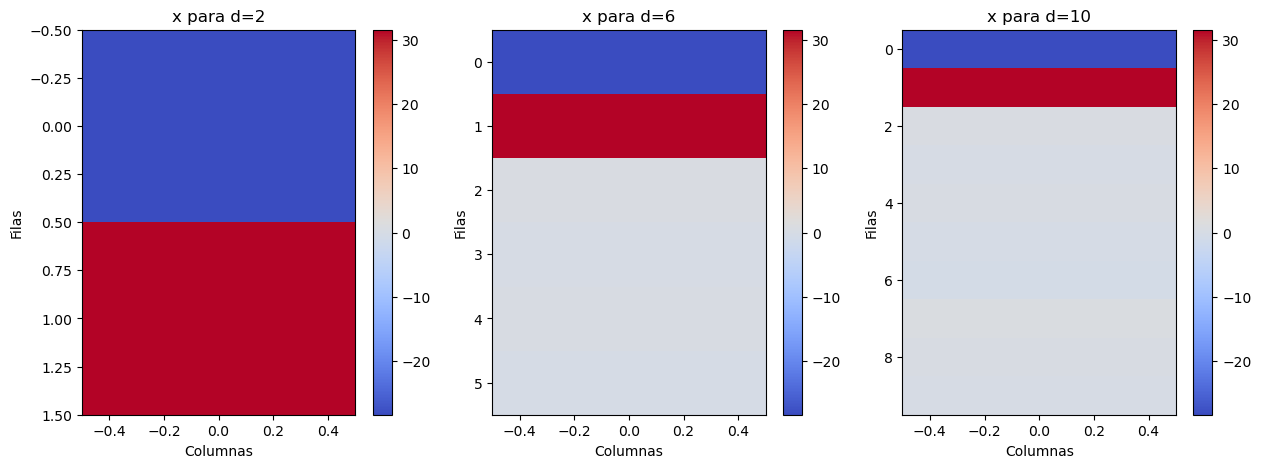

In [19]:
x2 = pseudo_inverse2 @ y_cent

x6 = pseudo_inverse6 @ y_cent

x10 = pseudo_inverse10 @ y_cent


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
im0 = axs[0].imshow(x2[:, np.newaxis], cmap='coolwarm', aspect='auto')
axs[0].set_title('x para d=2')
axs[0].set_xlabel('Columnas')
axs[0].set_ylabel('Filas')
fig.colorbar(im0, ax=axs[0])

im1 = axs[1].imshow(x6[:, np.newaxis], cmap='coolwarm', aspect='auto')
axs[1].set_title('x para d=6')
axs[1].set_xlabel('Columnas')
axs[1].set_ylabel('Filas')
fig.colorbar(im1, ax=axs[1])

im2 = axs[2].imshow(x10[:, np.newaxis], cmap='coolwarm', aspect='auto')
axs[2].set_title('x para d=10')
axs[2].set_xlabel('Columnas')
axs[2].set_ylabel('Filas')
fig.colorbar(im2, ax=axs[2])

plt.show()

Para distintos valores de d hago el PCA y comparo las normas entre el y centrado y las soluciones.

El valor de d para el cual la norma es mínima es 105


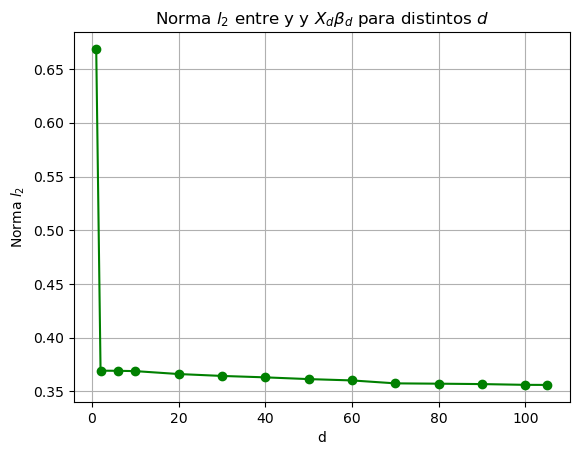

In [20]:
u, s, v_T = np.linalg.svd(matriz_cent, full_matrices=False)

ds = range(1, 106)
norms = []
ds = [1, 2, 6, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 105]

def invert_diagonal_matrix(diagonal_matrix):
    n = len(diagonal_matrix)
    inverse_diagonal_matrix = np.zeros((n, n))
    for i in range(n):
        if diagonal_matrix[i, i] >= 1e-10:
            inverse_diagonal_matrix[i, i] = 1 / diagonal_matrix[i, i]
        else:
            inverse_diagonal_matrix[i, i] = 0
    
    return np.diag(inverse_diagonal_matrix)

for d in ds:
    u_d, s_d, v_T_d = truncate_svd(u, s, v_T, d)
    matriz_d = matriz_cent @ v_T_d.T
    matriz_d = center_matrix(matriz_d)
    ud, sd, vTd = np.linalg.svd(matriz_d, full_matrices=False)
    sd_inv = invert_diagonal_matrix(np.diag(sd))
    pseudo_inversed = vTd.T @ np.diag(sd_inv) @ ud.T
    x = pseudo_inversed @ y_cent
    norm = np.linalg.norm(y_cent - (matriz_d @ x))
    norms.append(norm/np.linalg.norm(y_cent))

# para los valores en los que la diagonal de s es 0, entonces, la inversa tiene valores muy grandes en la diagonal y se obtienen valores muy grandes en la norma
# esto se soluciona haciendo 0 los valores en la diagonal cuando son menores a un epsilon

# para la matriz entera X se obtiene la pseudo-inversa y se comparan posición a posición las normas entre las coordenadas de y y la aproximación que sale de hacer X x \beta

# printeo el valor de d para el cual la norma es mínima
print(f'El valor de d para el cual la norma es mínima es {ds[np.argmin(norms)]}')

plt.plot(ds, norms, color='green', marker='o')
plt.title(r'Norma $l_2$ entre y y $X_d\beta_d$ para distintos $d$')
plt.xlabel('d')
plt.ylabel(r'Norma $l_2$')
plt.grid()
plt.show()

Gráfico del error absoluto:

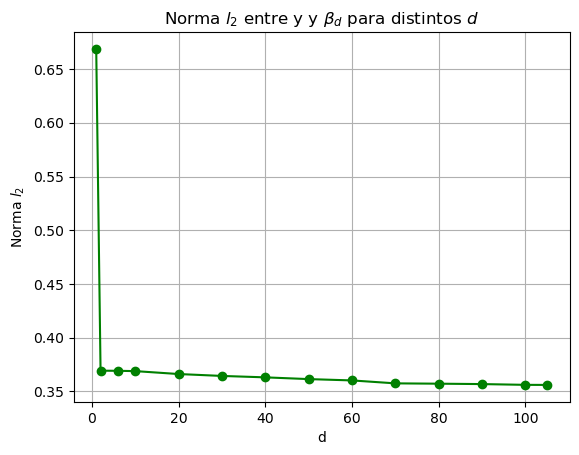

In [21]:
# para cada uno de los valores de d, calcular la similaridad entre y y la solucion que sale de multiplicar la matriz reducida a d dimensiones y x
ds = range(1, 106)
norms = []
ds = [1, 2, 6, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 105]

for d in ds:
    u_d, s_d, v_T_d = truncate_svd(u, s, v_T, d)
    matriz_d = matriz_cent @ v_T_d.T
    matriz_d = center_matrix(matriz_d)
    ud, sd, vTd = np.linalg.svd(matriz_d, full_matrices=False)
    sd_inv = invert_diagonal_matrix(np.diag(sd))
    pseudo_inversed = vTd.T @ np.diag(sd_inv) @ ud.T
    x = pseudo_inversed @ y_cent
    norm = np.linalg.norm(y_cent - (matriz_d @ x))
    norms.append(norm/np.linalg.norm(y_cent))

plt.plot(ds, norms, color='green', marker='o')
plt.title(r'Norma $l_2$ entre y y $\beta_d$ para distintos $d$')
plt.xlabel('d')
plt.ylabel(r'Norma $l_2$')
plt.grid()
plt.show()


Para cada valor de d grafico la aproximación que obtuve por multiplicar X por el vector beta encontrado en cada dimension

In [23]:
y_2 = Z_cent_2 @ x2
y_6 = Z_cent_6 @ x6
y_10 = Z_cent_10 @ x10
u, s, v_T = np.linalg.svd(matriz_cent, full_matrices=False)
u100, s100, v_T100 = truncate_svd(u, s, v_T, 105)


s100 = np.diag(s100)
s100_inv = invert_diagonal_matrix(np.diag(s100))
pseudo_inverse100 = v_T100.T @ np.diag(s100_inv) @ u100.T
x100 = pseudo_inverse100 @ y_cent
Z_cent_100 = matriz_cent @ v_T100.T
y_100 = Z_cent_100 @ x100

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
im_1 = axs[0].imshow(y_2[:, np.newaxis], cmap='coolwarm', aspect='auto')
axs[0].set_title('y para d=2')
axs[0].set_xlabel('Columnas')
axs[0].set_ylabel('Filas')
fig.colorbar(im_1, ax=axs[0])

im_2 = axs[1].imshow(y_6[:, np.newaxis], cmap='coolwarm', aspect='auto')
axs[1].set_title('y para d=6')
axs[1].set_xlabel('Columnas')
axs[1].set_ylabel('Filas')
fig.colorbar(im_2, ax=axs[1])

im_3 = axs[2].imshow(y_10[:, np.newaxis], cmap='coolwarm', aspect='auto')
axs[2].set_title('y para d=10')
axs[2].set_xlabel('Columnas')
axs[2].set_ylabel('Filas')
fig.colorbar(im_3, ax=axs[2])

im_4 = axs[3].imshow(y_100[:, np.newaxis], cmap='coolwarm', aspect='auto')
axs[3].set_title('y centrado')
axs[3].set_xlabel('Columnas')
axs[3].set_ylabel('Filas')
fig.colorbar(im_4, ax=axs[3])

plt.show()


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 106 is different from 105)

Gráfico para tres dimensiones: 

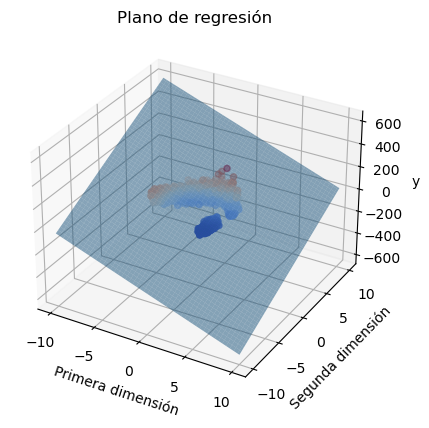

In [ ]:
# para el PCA que da la reducción a 2 dimensiones grafico el plano que está dado por beta_1 y beta_2
# grafico con scatter los puntos de la matriz Z_cent_2
# el gráfico es el plano en 3d con la altura de los puntos dada por las etiquetas que se encuantean en y_cent

def pseudo_inverse(matriz):
    u, s, v_T = np.linalg.svd(matriz, full_matrices=False)
    s_inv = invert_diagonal_matrix(np.diag(s))
    return v_T.T @ np.diag(s_inv) @ u.T

u, s, v_T = np.linalg.svd(matriz_cent, full_matrices=False)
d = 2
u_2, s_2, v_T_2 = truncate_svd(u, s, v_T, d)
v_2 = v_T_2.T
Z_cent_2 = matriz @ v_2
pseudo_inv = pseudo_inverse(Z_cent_2)
beta = pseudo_inv @ y_cent

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = beta[0] * X + beta[1] * Y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.scatter(Z_cent_2[:, 0], Z_cent_2[:, 1], y_cent, c=y_cent, cmap='coolwarm')
ax.set_title('Plano de regresión')
ax.set_xlabel('Primera dimensión')
ax.set_ylabel('Segunda dimensión')
ax.set_zlabel('y')
plt.show()



Dada la descomposición svd de la matriz original centrada quiero averiguar cuál es la coordenada que después de multiplicarse por el vector beta

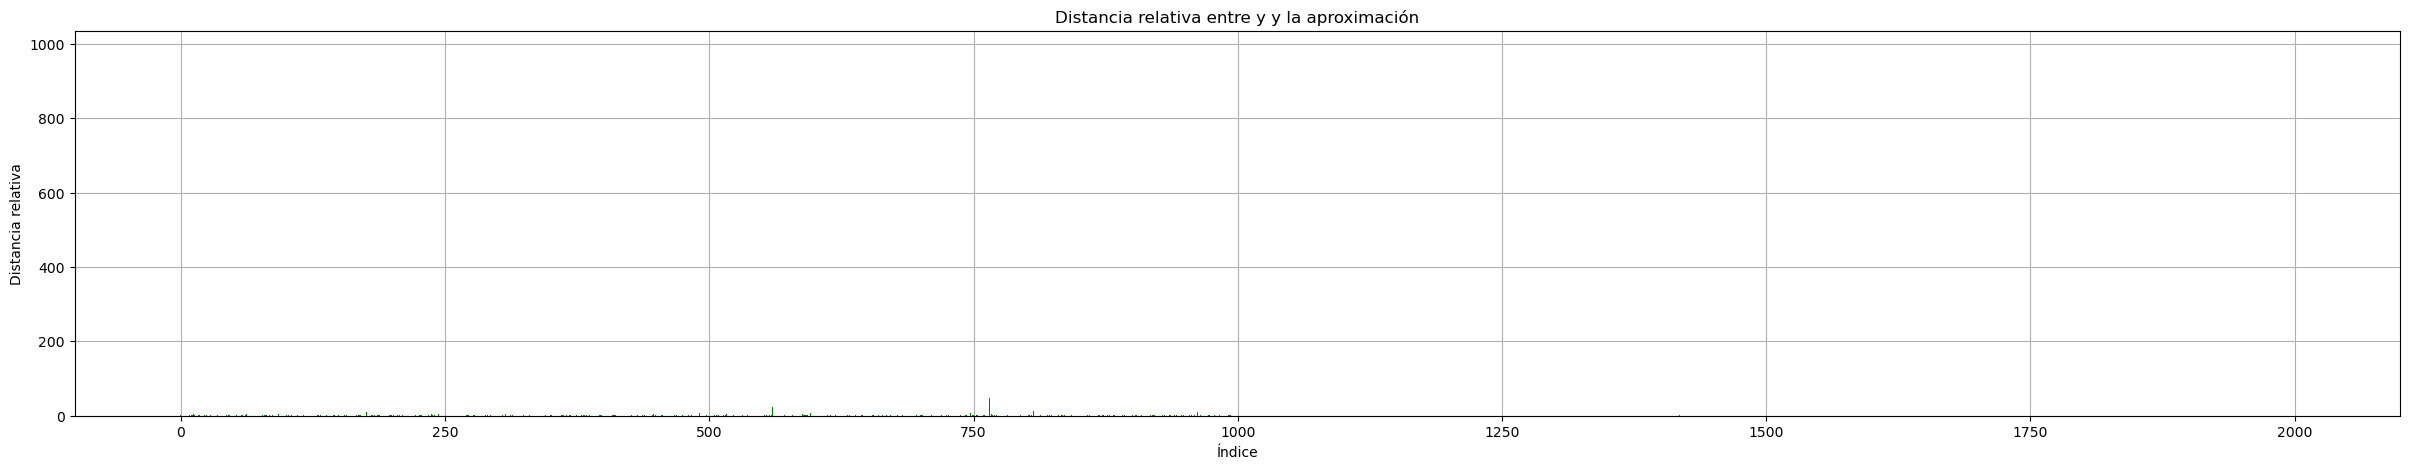

El índice con menor distancia relativa es 260 con valor 0.0004318826825115261
El índice con menor distancia absoluta es 260 con valor 0.03959275985648958
(106,)
Los 5 índices con mayor valor absoluto en beta son [ 12  28 105 103 101], con valores [-3.49375869  4.34037997 23.17321898 23.17321898 23.17321898]


In [ ]:
# para cada distancia entre las coordenadas de y y la aproximación que sale de hacer X x \beta, graficar la distancia con un gráfico de barras donde la altura de cada barra es la distancia relativa

pseudo_inverse = pseudo_inverse(matriz_cent)
beta = pseudo_inverse @ y_cent
approximation = matriz_cent @ beta


plt.figure(figsize=(30, 5))
# para cada índice en approximation calcular la distancia relativa entre el mismo indice en y y la aproximación
distances = np.abs(y_cent - approximation) / np.abs(y_cent)
distances_absolute = np.abs(y_cent - approximation)
plt.bar(range(len(distances)), distances, color='green')
plt.title('Distancia relativa entre y y la aproximación')
plt.xlabel('Índice')
plt.ylabel('Distancia relativa')
plt.grid()
plt.show()

# printar el índice que tiene el menor valor absoluto en la distancia relativa
# min_index = np.argmin(np.abs(distances))
min_index = np.argsort(np.abs(distances))[0]
min_2 = np.argsort(np.abs(distances_absolute))[0]
print(f'El índice con menor distancia relativa es {min_index} con valor {distances[min_index]}')
print(f'El índice con menor distancia absoluta es {min_2} con valor {distances_absolute[min_2]}')

# dentro del beta que printear los 5 indices con mayor valor absoluto
print(beta.shape)
max_indices = np.argsort(np.abs(beta))[-5:]
print(f'Los 5 índices con mayor valor absoluto en beta son {max_indices}, con valores {beta[max_indices]}')





Gráfico de los valores de el vector beta para las 105 dimenensiones:

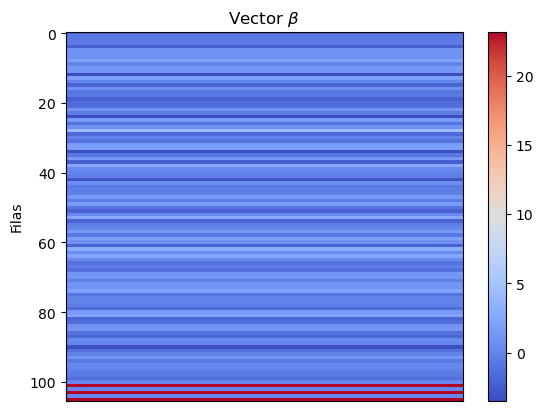

In [28]:
def pseudo_inverse(matriz):
    u, s, v_T = np.linalg.svd(matriz, full_matrices=False)
    s_inv = invert_diagonal_matrix(np.diag(s))
    return v_T.T @ np.diag(s_inv) @ u.T

u, s, v_T = np.linalg.svd(matriz_cent, full_matrices=False)
pseudo_inv = pseudo_inverse(matriz_cent)
beta = pseudo_inv @ y_cent

# grafico beta como un heatmap en la que el color de cada celda es el valor de beta
plt.imshow(beta[:, np.newaxis], cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title(r'Vector $\beta$')
plt.ylabel('Filas')
plt.xticks([])
plt.show()
